# Tareas a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Que queremos predecir y porques
    
2. Cargar el *dataset tips* <https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/tips.csv> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

## 1. Indroduccion

Disponemos de un Data Set con los registro de los gastos de comidas de un restaurante y otras caracteristicas considerada utiles.

El objetivo es predecir la PROPINA  que dejan los clientes en un restaurante.


## 2. Cargar el dataset
- Importamos Pandas
- Copiamos los datos en formato csv y lo colocamos en un nuevo archivo en el directorio (tips.csv) 
- Leemos una primera muestra de 20 filas aleatoria, para visualizar el dataframe, sobretodo ver el Header.  

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('tips.csv')
print(df.sample(n=20))

     total_bill    tip     sex smoker   day    time  size
117       10.65   1.50  Female     No  Thur   Lunch     2
6          8.77   2.00    Male     No   Sun  Dinner     2
229       22.12   2.88  Female    Yes   Sat  Dinner     2
102       44.30   2.50  Female    Yes   Sat  Dinner     3
63        18.29   3.76    Male    Yes   Sat  Dinner     4
161       12.66   2.50    Male     No   Sun  Dinner     2
78        22.76   3.00    Male     No  Thur   Lunch     2
125       29.80   4.20  Female     No  Thur   Lunch     6
112       38.07   4.00    Male     No   Sun  Dinner     3
67         3.07   1.00  Female    Yes   Sat  Dinner     1
41        17.46   2.54    Male     No   Sun  Dinner     2
93        16.32   4.30  Female    Yes   Fri  Dinner     2
231       15.69   3.00    Male    Yes   Sat  Dinner     3
57        26.41   1.50  Female     No   Sat  Dinner     2
115       17.31   3.50  Female     No   Sun  Dinner     2
130       19.08   1.50    Male     No  Thur   Lunch     2
170       50.8

### Renombramos columnas

- leemos la cabecera, para tener presente los nombre y poder renombrar mas facilmente.

In [5]:
df.columns= ['Total Tiket', 'Propina','Genero','Fumador','Dia','Evento','Comensales']
print(df.head())

   Total Tiket  Propina  Genero Fumador  Dia  Evento  Comensales
0        16.99     1.01  Female      No  Sun  Dinner           2
1        10.34     1.66    Male      No  Sun  Dinner           3
2        21.01     3.50    Male      No  Sun  Dinner           3
3        23.68     3.31    Male      No  Sun  Dinner           2
4        24.59     3.61  Female      No  Sun  Dinner           4


### Renombrar variables
- Renombramos los valores de las variables categoricas

In [6]:
df = df.replace({
    "Genero": {
        "Female": "Mujer",
        "Male": "Hombre"
    },
    "Dia":{
        "Thur": "Miercoles",
        "Fri": "Viernes",       
        "Sat": "Sabado",
        "Sun": "Domingo",
    },
    "Fumador": {
        "Yes": "Sí",
        "No": "No"
    },
    "Evento": {
        "Dinner": "Cena",
        "Lunch": "Almuerzo"
    }
})
print(df)

     Total Tiket  Propina  Genero Fumador        Dia Evento  Comensales
0          16.99     1.01   Mujer      No    Domingo   Cena           2
1          10.34     1.66  Hombre      No    Domingo   Cena           3
2          21.01     3.50  Hombre      No    Domingo   Cena           3
3          23.68     3.31  Hombre      No    Domingo   Cena           2
4          24.59     3.61   Mujer      No    Domingo   Cena           4
..           ...      ...     ...     ...        ...    ...         ...
239        29.03     5.92  Hombre      No     Sabado   Cena           3
240        27.18     2.00   Mujer      Sí     Sabado   Cena           2
241        22.67     2.00  Hombre      Sí     Sabado   Cena           2
242        17.82     1.75  Hombre      No     Sabado   Cena           2
243        18.78     3.00   Mujer      No  Miercoles   Cena           2

[244 rows x 7 columns]


### Tipos de datos
- Averiguar tipos de datos, tamaño, etc

In [7]:
print(
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(df.dtypes.to_frame(name="Tipos de datos"))

Numero de filas y columnas:(244, 7)
Numero total de elementos : 1708
 
            Tipos de datos
Total Tiket        float64
Propina            float64
Genero              object
Fumador             object
Dia                 object
Evento              object
Comensales           int64


### Definir Variable Cualitativa y Cuantitativa
- Generamos una nueva tabla para identificar el tipo de variable ( Cualitativa o cuantitativa), a nivel teorico como   complemento a la informacion que ya tenemos.

In [8]:
tabla_tipos = pd.DataFrame({
    "Nombre": df.columns,
    "Tipo": [
        "Cuantitativa / Continua",
        "Cuantitativa / Continua",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cualitativa / Nominal",
        "Cuantitativa / Discreta"
    ]
})
print(tabla_tipos.to_string(index=False))

     Nombre                    Tipo
Total Tiket Cuantitativa / Continua
    Propina Cuantitativa / Continua
     Genero   Cualitativa / Nominal
    Fumador   Cualitativa / Nominal
        Dia   Cualitativa / Nominal
     Evento   Cualitativa / Nominal
 Comensales Cuantitativa / Discreta


### Nulos 
- Inspeccion  *estructura* completa de nuestra data y detectar valore nulos.

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Tiket  244 non-null    float64
 1   Propina      244 non-null    float64
 2   Genero       244 non-null    object 
 3   Fumador      244 non-null    object 
 4   Dia          244 non-null    object 
 5   Evento       244 non-null    object 
 6   Comensales   244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


**no se evidencian valores nulos**

- añadimos codigo para detectar valores nulos, solo para practicar.

In [10]:
# creamos un nuevo df donde ponemos un dicionario indicando la columna y la funcion

df_nulos = pd.DataFrame({    
    'nulos': df.isna().sum(),                        # mustra la suma de los nulos contenidos en las columnas 
    'porcentaje': (df.isna().mean() * 100).round(2)  # muestra el porcentaje con dos decimales
})

df_nulos = df_nulos[df_nulos['nulos'] > 0]

df_nulos

,nulos,porcentaje


- añadimos codigo simulando susutituir la media (de una columna determinada), para los valores nulos.
- otra opcion es borrar filas o columnas, utilizando el metod .dropna ()pero no es recomendable perder datos.Podemos utilizrlo en caso de tener     columnas con muchos datos vacios, en este caso aportaria poco valor y no seria necesarios completarla con datos.

In [11]:
# el metodo fillna es el encargado de realizar la sustitucion, con el valor de la media.
df['Propina'] = df['Propina'].fillna(df['Propina'].mean())

# df_borrar_colum =df.dropna(subset=["Propina"])

## 3.Estadisicas basica 
  ### Visualizacion estadisticos
  - Realizamos una inspeccion para visualizar los valores estadistico principales para ambas columnas tanto numericas como categoricas.

In [12]:
tabla_basica = df.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
     'mean' :'Media',
     'std':'Desviacion',
     'min': 'Valor minimo',
     'max': 'Valor maximo'})

print(tabla_basica)

                   Total Tiket     Propina  Genero Fumador     Dia Evento  \
Total               244.000000  244.000000     244     244     244    244   
Valor unicos               NaN         NaN       2       2       4      2   
Valor + frecuente          NaN         NaN  Hombre      No  Sabado   Cena   
Valor + comun              NaN         NaN     157     151      87    176   
Media                19.785943    2.998279     NaN     NaN     NaN    NaN   
Desviacion            8.902412    1.383638     NaN     NaN     NaN    NaN   
Valor minimo          3.070000    1.000000     NaN     NaN     NaN    NaN   
25%                  13.347500    2.000000     NaN     NaN     NaN    NaN   
50%                  17.795000    2.900000     NaN     NaN     NaN    NaN   
75%                  24.127500    3.562500     NaN     NaN     NaN    NaN   
Valor maximo         50.810000   10.000000     NaN     NaN     NaN    NaN   

                   Comensales  
Total              244.000000  
Valor unico

Report rapido columnas numericas:
- Podemos sospechar desde un primer momentos  posibles *outliers*.
- Revisando los valores min y sobretodo los max de las variables: total_bill y tip, estan bastante alejado de los valores promedio. 
- Aun asi no podemos confirmarlo sin un analisis mas visual o estadistico, para poderlos identificar con mas precision.

Report rapido para columnas categoricas:
- unique --> detecta la cantidad de valores unicos.
- top --> valor categorico mas frecuente.
- freq--> frecuencia del valor mas frecuente.Ej ( sex: top/ Male y freq/157 y count/244 nos puede dar pistas)


### Rangos IQR y Limites
- definimos los rangos intercuartilicos y el umbra estadistico con los limites inferiores y superiores,

In [13]:
limites = {}

for columna in ['Total Tiket', 'Propina']:
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1

    limite_inferior = max(0, q1 - 1.5 * iqr)
    limite_superior = q3 + 1.5 * iqr

    limites[columna] = (limite_inferior, limite_superior)

    print(f"\n{columna}")
    print(f"IQR: {iqr}")
    print(f"Límites: [{limite_inferior}, {limite_superior}]")


Total Tiket
IQR: 10.779999999999998
Límites: [0, 40.29749999999999]

Propina
IQR: 1.5625
Límites: [0, 5.90625]


### Outliers

-outliers de Total_tiket 

In [14]:
# Outliers Total Ticket
li_ticket, ls_ticket = limites['Total Tiket']
outliers_superiores_tiket = df[(df['Total Tiket'] > ls_ticket)]

print("Outliers Superiores en Total Tiket:")
print(outliers_superiores_tiket[['Total Tiket']])   
print("Cantidad de outliers:", outliers_superiores_tiket.shape[0])


Outliers Superiores en Total Tiket:
     Total Tiket
59         48.27
102        44.30
142        41.19
156        48.17
170        50.81
182        45.35
184        40.55
197        43.11
212        48.33
Cantidad de outliers: 9


- outliers de Propinas

In [15]:
# Outliers Propina
li_propina, ls_propina = limites['Propina']
outliers_superiores_propina = df[(df['Propina'] > ls_propina)]

print("Outliers Superiores en Propina:")
print(outliers_superiores_propina[['Propina']])   
print("Cantidad de outliers:", outliers_superiores_propina.shape[0])

Outliers Superiores en Propina:
     Propina
23      7.58
47      6.00
59      6.73
141     6.70
170    10.00
183     6.50
212     9.00
214     6.50
239     5.92
Cantidad de outliers: 9


- Respectivamete para:
  valores superiores a 40.29 en Total tiket se consideran outlier
  valores superiores a 5.90 en Propina se consideran outlier

### Definicion tipos de Variables

- Especificamos los tipos object. Aunque el dataSet no es grande y no se especifica ahorro de memoria (13.5 Kb), será util para analisis categorico futuro y Machine Learning.

In [16]:
columnas = ['Genero','Fumador', 'Dia', 'Evento']
for c in columnas:
    df[c]=df[c].astype('category')
print(df.dtypes)

Total Tiket     float64
Propina         float64
Genero         category
Fumador        category
Dia            category
Evento         category
Comensales        int64
dtype: object


### Nivel de occurencias
- realizamos una inspeccion para averiguar las ocurencias de cada valor unico en las variables categoricas y ver si esta balanceado.

In [17]:
for col in df.select_dtypes(include='category'):
    print(f"\n{'*'*20}")
    print(df[col].value_counts())



********************
Genero
Hombre    157
Mujer      87
Name: count, dtype: int64

********************
Fumador
No    151
Sí     93
Name: count, dtype: int64

********************
Dia
Sabado       87
Domingo      76
Miercoles    62
Viernes      19
Name: count, dtype: int64

********************
Evento
Cena        176
Almuerzo     68
Name: count, dtype: int64


Conclusiones:

- en la varible Genero los datos no estan balanceados, proque tenemos casi el doble de  hombres que mujeres.
- en la variable de Fumadores no es tan evidente.
- en los dias el Viernes tiene muy pocas representaciones.
- en el caso de Eventos esta miuy debalanceado, teniendo un predominio con la cena. 

Si optaramos para un modelo de clasificacion, podria ser un problema a resolver.
El caso planteado se estudiará con un modelo de regresion y tendremos tener en cuenta las variables [Genero_Mujer  y Evento_Viernes]porque dispondrá de menos datos. Los coeficientes para estos , seran menos precisos.

### Correlacion
- correlacion entre variables

In [18]:
corr_numeric = df.select_dtypes(include="number").corr(method='pearson')
print(corr_numeric)


             Total Tiket   Propina  Comensales
Total Tiket     1.000000  0.675734    0.598315
Propina         0.675734  1.000000    0.489299
Comensales      0.598315  0.489299    1.000000


Podemos observar rapidamente que hay correlacion MODERADA positiva entre propina/Total_tiket y algo ligeramente inferior entre propina/comensales. 
No podemos decir que esta correlacion implique causalidad todavia.

## 4. Limpieza 

### Valores Nulos
- Confirmamos que no hayan valores nulos.

In [19]:
print(f"Valores nulos:\n{df.isna().sum()}")


Valores nulos:
Total Tiket    0
Propina        0
Genero         0
Fumador        0
Dia            0
Evento         0
Comensales     0
dtype: int64


### Valores duplicados
- Confirmamos que no haya valores duplicados

In [20]:
print(f"Valores duplicados:\n{df.duplicated()}")
print(f"Valores duplicados:\n{df.duplicated().sum()}")

# muestra las filas duplicadas 
df[df.duplicated(keep=False)]


Valores duplicados:
0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool
Valores duplicados:
1


,Total Tiket,Propina,Genero,Fumador,Dia,Evento,Comensales
198,13.0,2.0,Mujer,Sí,Miercoles,Almuerzo,2
202,13.0,2.0,Mujer,Sí,Miercoles,Almuerzo,2


### Trasformacion
#### Discretizacion de valores numerico de Propina

In [21]:
### cut  es una funcion para discretizar variables numericas en intervalos ( bin )

df['Total_Tiket_Cat'] = pd.cut(df['Total Tiket'], bins=3, labels=['Bajo', 'Medio', 'Alto'])
df['Propina_Cat']= pd.cut(df['Propina'], bins=3 , labels= ['Baja','Media', 'Alta'])

print(df[['Propina', 'Propina_Cat', 'Total Tiket', 'Total_Tiket_Cat']])


     Propina Propina_Cat  Total Tiket Total_Tiket_Cat
0       1.01        Baja        16.99            Bajo
1       1.66        Baja        10.34            Bajo
2       3.50        Baja        21.01           Medio
3       3.31        Baja        23.68           Medio
4       3.61        Baja        24.59           Medio
..       ...         ...          ...             ...
239     5.92       Media        29.03           Medio
240     2.00        Baja        27.18           Medio
241     2.00        Baja        22.67           Medio
242     1.75        Baja        17.82            Bajo
243     3.00        Baja        18.78            Bajo

[244 rows x 4 columns]


#### codificacion de categoria (One-Hot) 

#### correlacion entre variables

## 5.Visualizacion

In [29]:
df.head()

,Total Tiket,Propina,Genero,Fumador,Dia,Evento,Comensales,Total_Tiket_Cat,Propina_Cat
0,16.99,1.01,Mujer,No,Domingo,Cena,2,Bajo,Baja
1,10.34,1.66,Hombre,No,Domingo,Cena,3,Bajo,Baja
2,21.01,3.50,Hombre,No,Domingo,Cena,3,Medio,Baja
3,23.68,3.31,Hombre,No,Domingo,Cena,2,Medio,Baja
4,24.59,3.61,Mujer,No,Domingo,Cena,4,Medio,Baja


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece tamaño de visualizacion de los graficos
plt.rcParams['figure.figsize'] = (10, 6)

### Graficos Univariante

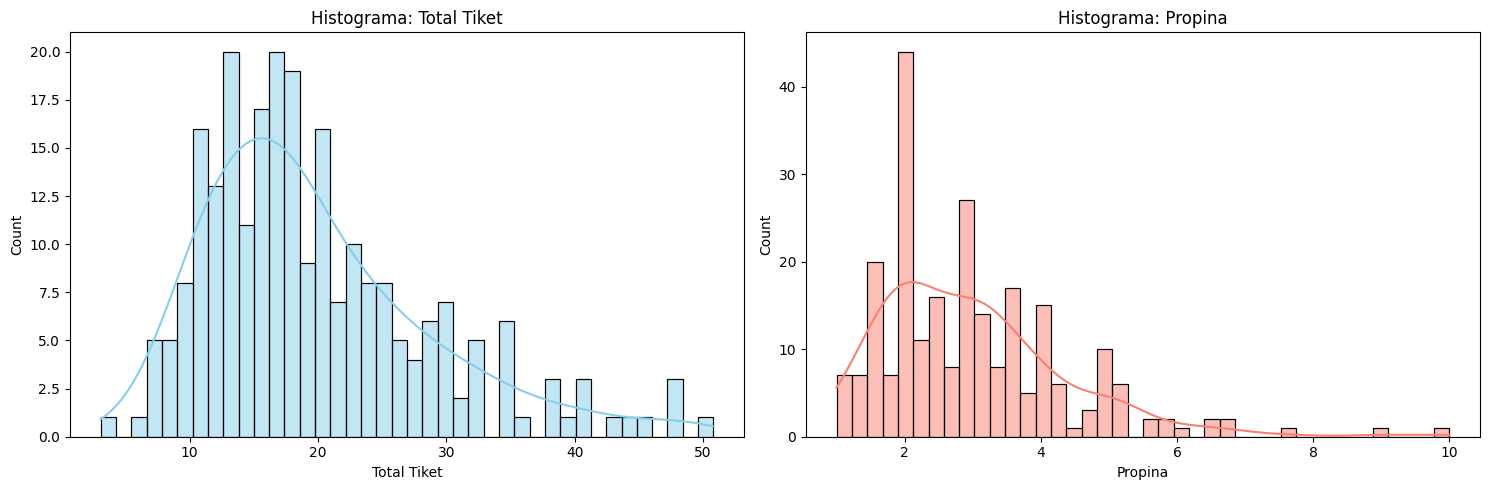

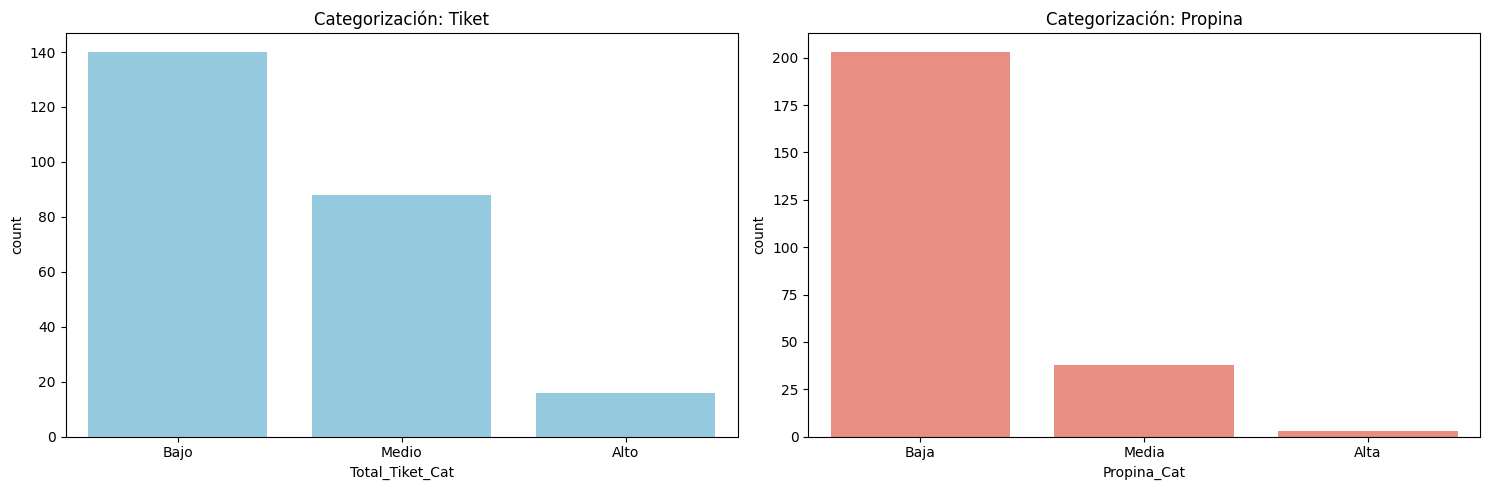

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15,5))

# Histograma TOTAL TIKET
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total Tiket', bins=40, kde=True, color='skyblue')
plt.title('Histograma: Total Tiket')

# Histograma PROPINA
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Propina', bins=40, kde=True, color='salmon')
plt.title('Histograma: Propina')

plt.tight_layout()
plt.show()




plt.figure(figsize=(15,5))

# Grafico Barras : Frecuencia TOTAL_TIKET_CAT
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Total_Tiket_Cat', color='skyblue')
plt.title('Categorización: Tiket')

# Grafico Barras :  Frecuencia PROPINA_CAT
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Propina_Cat', color='salmon')
plt.title('Categorización: Propina')

plt.tight_layout()
plt.show()


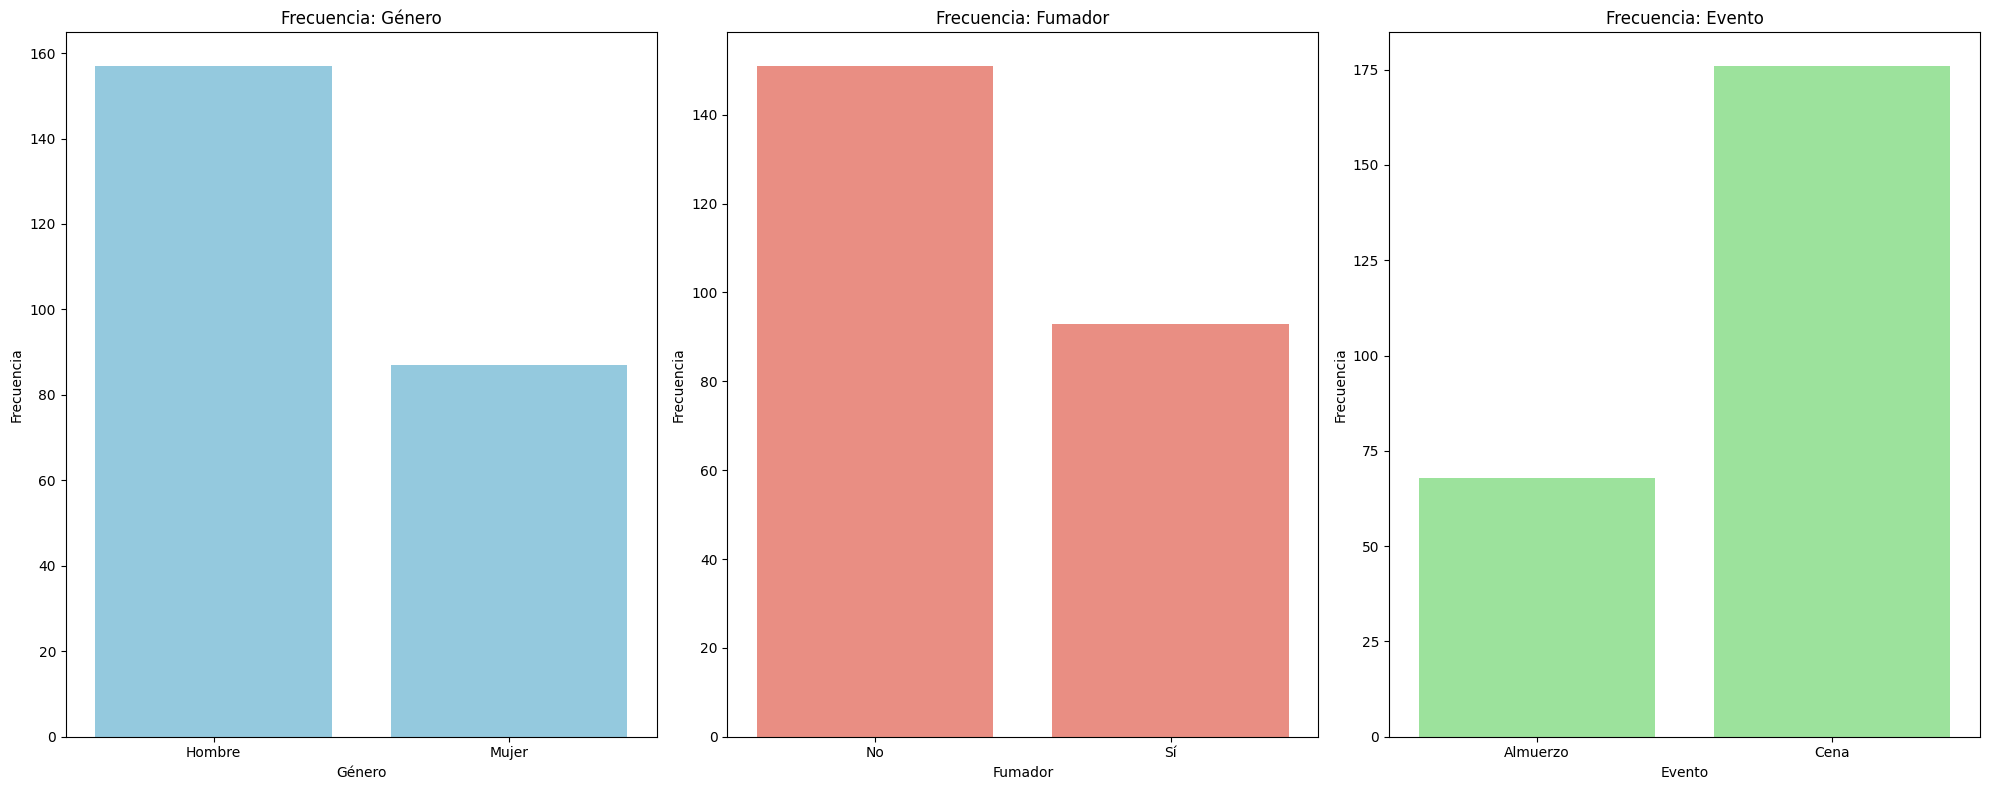

In [106]:
plt.figure(figsize=(20,8))

# Gráfico de frecuencia: GENERO
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Genero', color='skyblue')
plt.title('Frecuencia: Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Gráfico de frecuencia: FUMADOR
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Fumador', color='salmon')
plt.title('Frecuencia: Fumador')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')

# Gráfico de frecuencia: EVENTO
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Evento', color='lightgreen')
plt.title('Frecuencia: Evento')
plt.xlabel('Evento')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



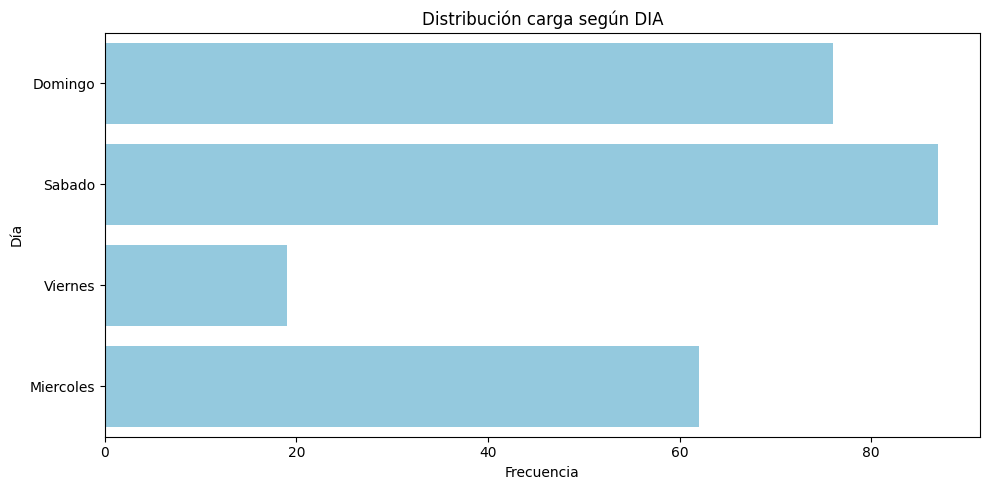

In [ ]:
orden_dias = ['Domingo', 'Sabado', 'Viernes', 'Miercoles']

# Preparamos los datos ordenados
conteo = df['Dia'].value_counts().reindex(orden_dias)

plt.figure(figsize=(10,5))

sns.barplot( x=conteo.values, y=conteo.index,orient='h',color='skyblue')

plt.title('Distribución carga según DIA')
plt.xlabel('Frecuencia')
plt.ylabel('Día')

plt.tight_layout()
plt.show()


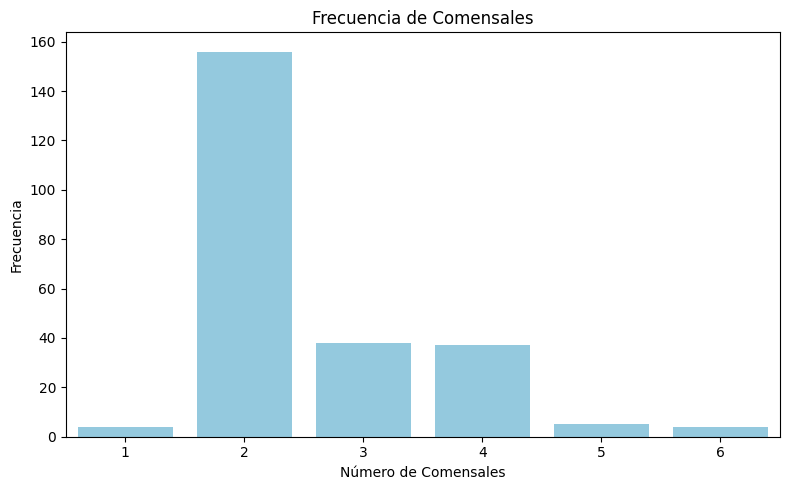

In [120]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=df['Comensales'].value_counts().sort_index().index,
    y=df['Comensales'].value_counts().sort_index().values,
    color='skyblue'
)

plt.title('Frecuencia de Comensales')
plt.xlabel('Número de Comensales')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()



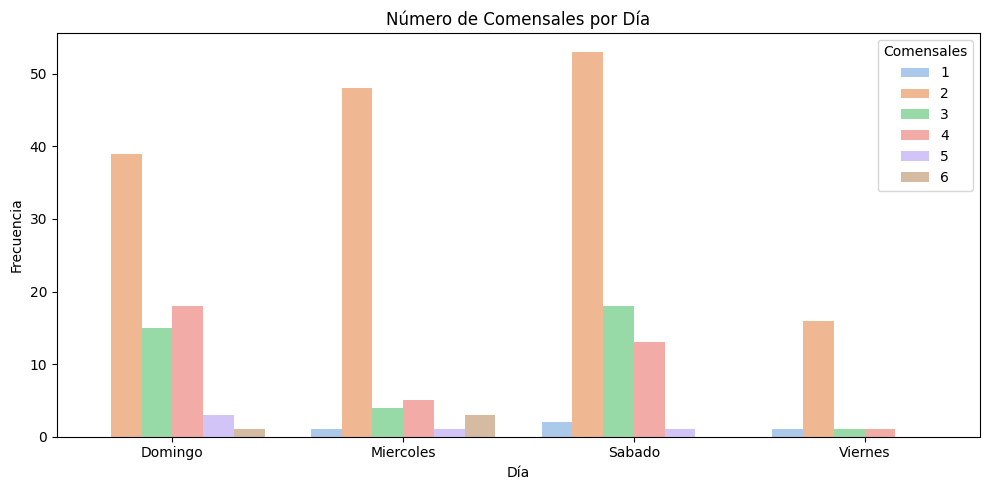

In [151]:
plt.figure(figsize=(10,5))

sns.countplot( data=df, x='Dia', hue='Comensales', palette='pastel')

plt.title('Número de Comensales por Día')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
plt.legend(title='Comensales')

plt.tight_layout()
plt.show()


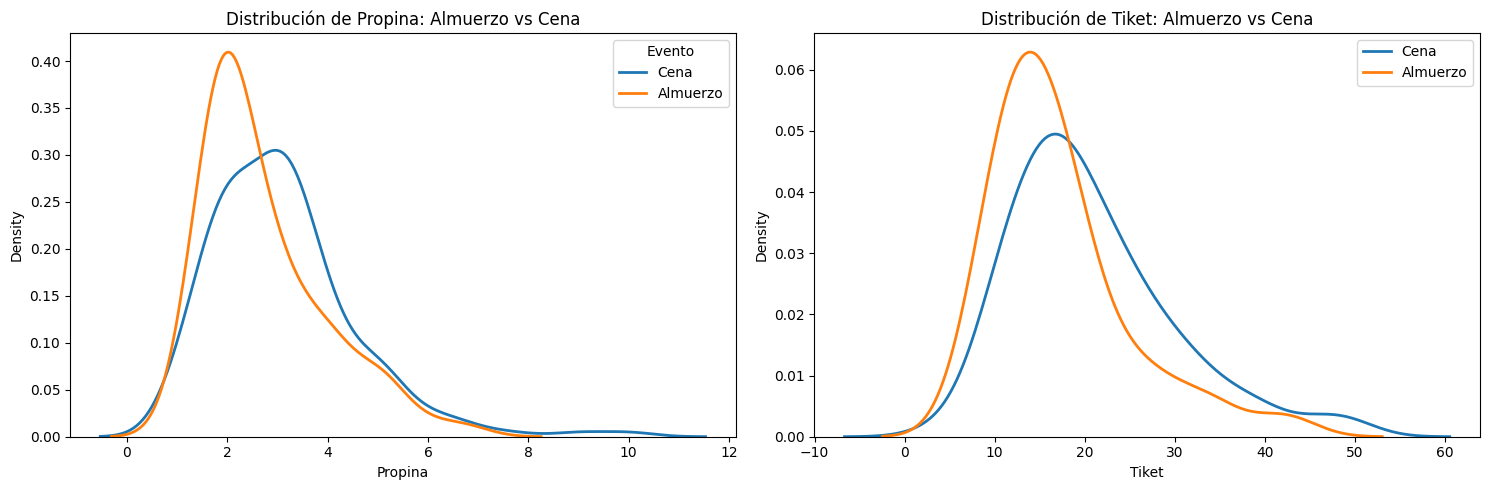

In [ ]:
plt.figure(figsize=(15,5))


# KDE de PROPINA por EVENTO

plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['Evento'] == 'Cena'], x='Propina', label='Cena', linewidth=2)
sns.kdeplot(data=df[df['Evento'] == 'Almuerzo'], x='Propina', label='Almuerzo', linewidth=2)

plt.title('Distribución de Propina: Almuerzo vs Cena')
plt.xlabel('Propina')
plt.legend(title='Evento') 

# KDE de TOTAL TIKET por EVENTO

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Evento'] == 'Cena'], x='Total Tiket', label='Cena', linewidth=2)
sns.kdeplot(data=df[df['Evento'] == 'Almuerzo'], x='Total Tiket', label='Almuerzo', linewidth=2)

plt.title('Distribución de Tiket: Almuerzo vs Cena')
plt.xlabel('Tiket')
plt.legend()

plt.tight_layout()
plt.show()


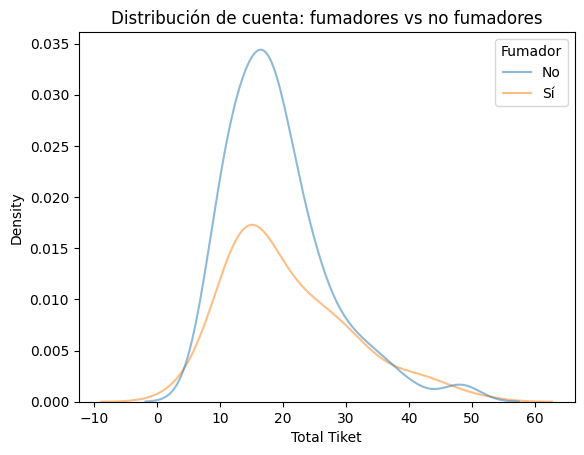

In [127]:
sns.kdeplot(data=df, x='Total Tiket', hue='Fumador', fill=False, alpha=0.5)
plt.title('Distribución de cuenta: fumadores vs no fumadores')
plt.show()

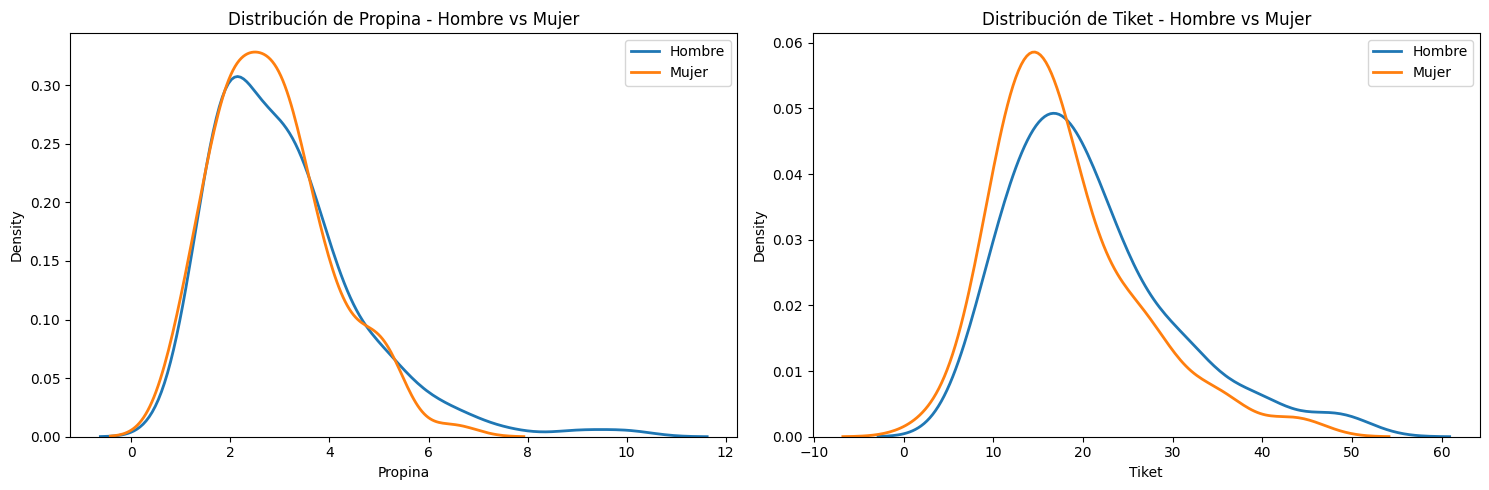

In [ ]:
plt.figure(figsize=(15,5))

# KDE de PROPINA por GÉNERO

sns.kdeplot(data=df[df['Genero'] == 'Hombre'], x='Propina', label='Hombre', linewidth=2)
sns.kdeplot(data=df[df['Genero'] == 'Mujer'], x='Propina', label='Mujer', linewidth=2)

plt.title('Distribución de Propina - Hombre vs Mujer')
plt.xlabel('Propina')
plt.legend()


# KDE de TOTAL TIKET por GÉNERO

plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['Genero'] == 'Hombre'], x='Total Tiket', label='Hombre', linewidth=2)
sns.kdeplot(data=df[df['Genero'] == 'Mujer'], x='Total Tiket', label='Mujer', linewidth=2)

plt.title('Distribución de Tiket - Hombre vs Mujer')
plt.xlabel('Tiket')
plt.legend()

plt.tight_layout()
plt.show()


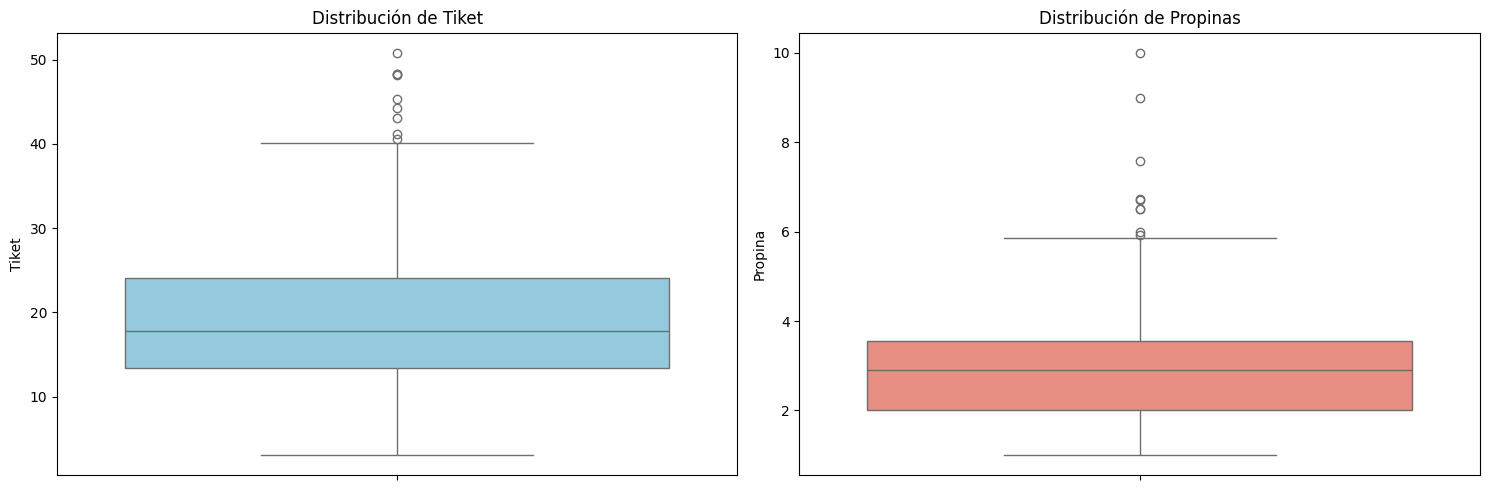

In [112]:
plt.figure(figsize=(15,5))

# Boxplot de Total Tiket
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='Total Tiket', color='skyblue')
plt.ylabel('Tiket')
plt.title('Distribución de Tiket')

# Boxplot de Propina
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='Propina', color='salmon')
plt.ylabel('Propina')
plt.title('Distribución de Propinas')

plt.tight_layout()


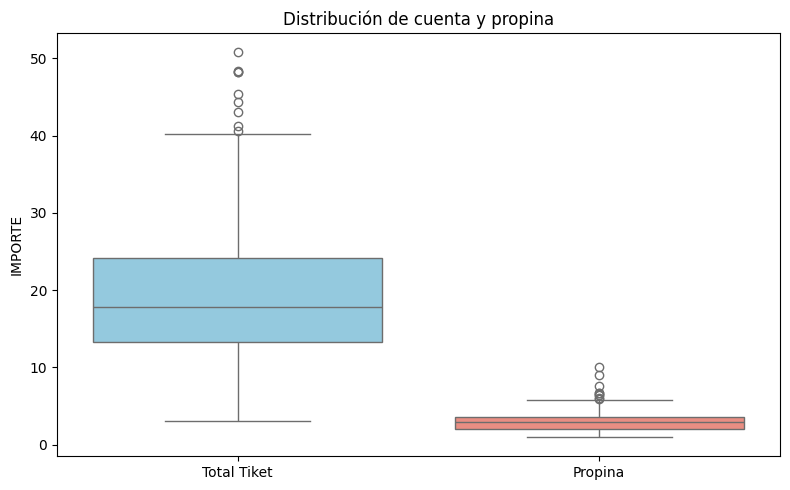

In [113]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df[['Total Tiket', 'Propina']], palette=['skyblue', 'salmon'])

plt.ylabel('IMPORTE')
plt.title('Distribución de cuenta y propina')

plt.tight_layout()
plt.show()


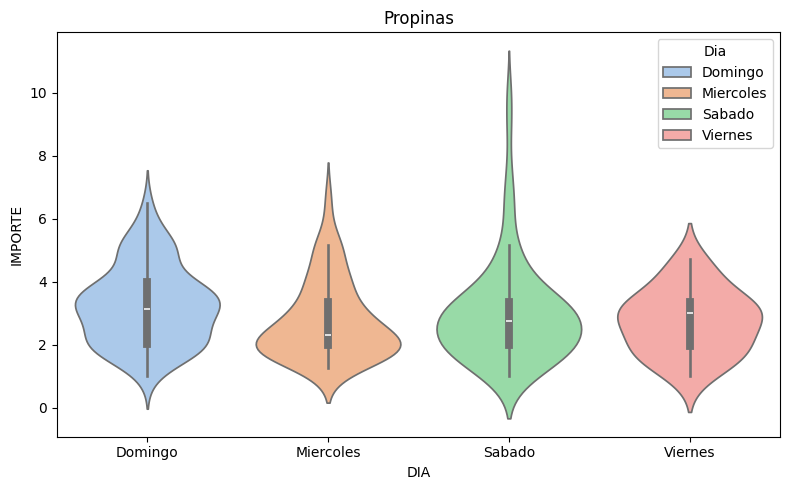

In [ ]:
plt.figure(figsize=(8,5))

sns.violinplot(data=df, x='Dia', y='Propina', hue='Dia', palette='pastel', legend=False)

plt.title('Propinas')
plt.xlabel('DIA')
plt.ylabel('IMPORTE')

plt.tight_layout()
plt.show()



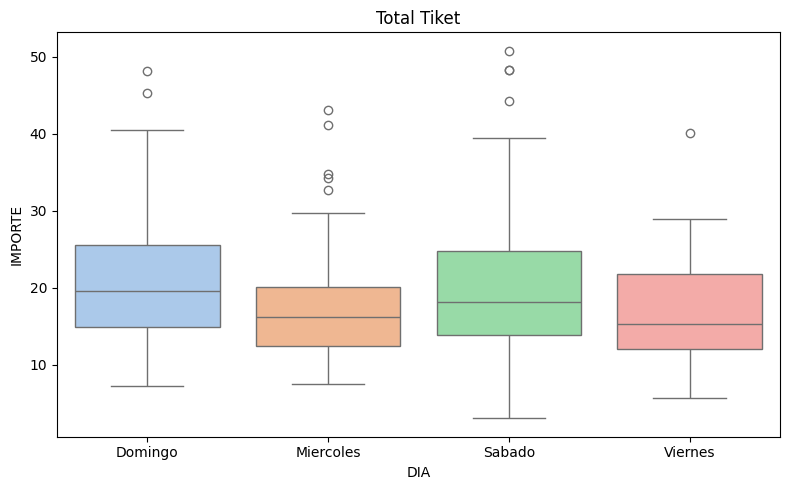

In [ ]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df, x='Dia',y='Total Tiket', hue='Dia', palette='pastel',legend=False)

plt.title('Total Tiket')
plt.xlabel('DIA')
plt.ylabel('IMPORTE')

plt.tight_layout()
plt.show()



### Graficos Bivariante

<Figure size 5500x500 with 0 Axes>

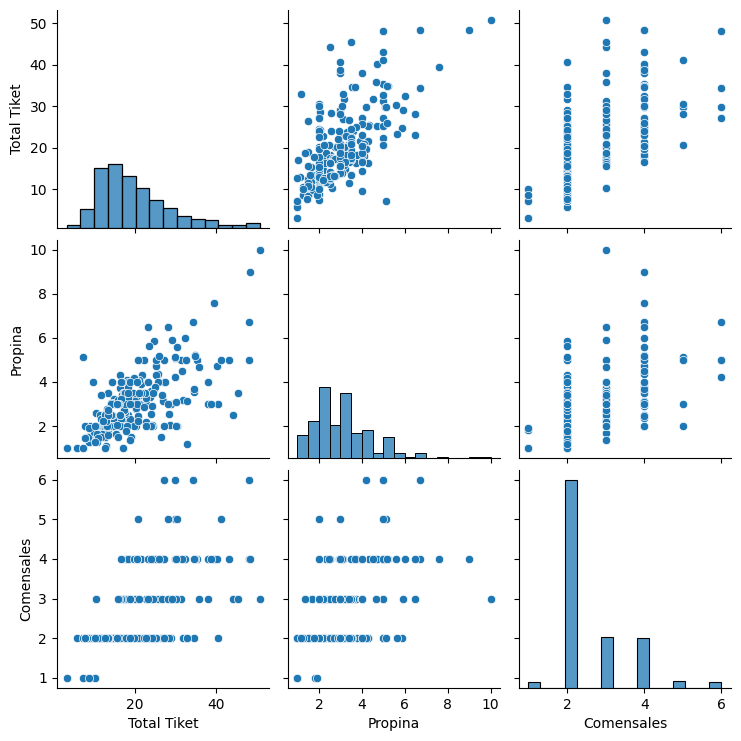

In [162]:
plt.figure(figsize=(55,5))
sns.pairplot(data=df, vars=['Total Tiket', 'Propina','Comensales'])
plt.show()

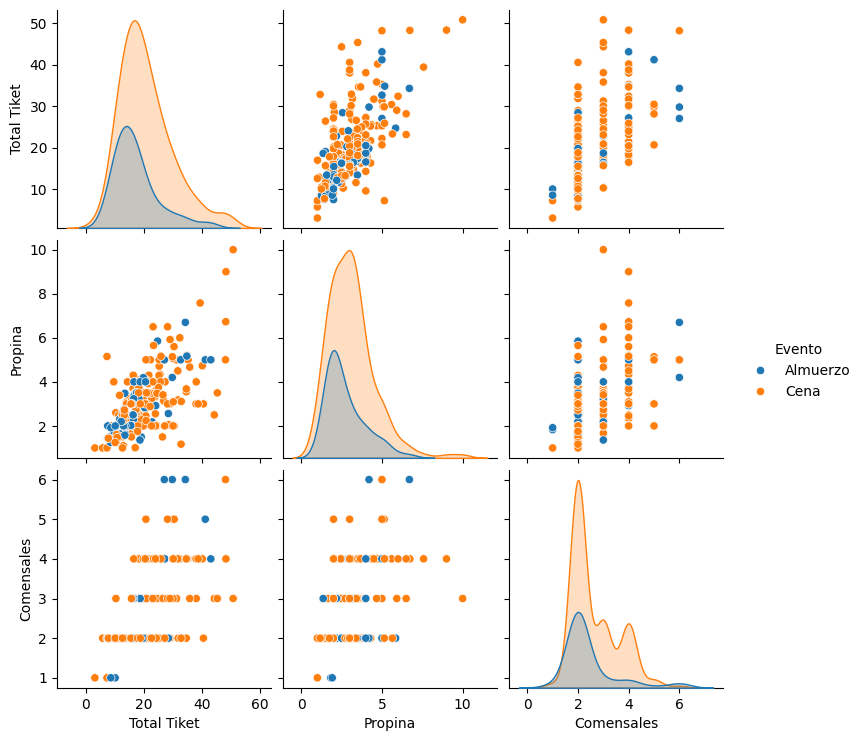

In [155]:
sns.pairplot(data=df, hue='Evento')
plt.show()

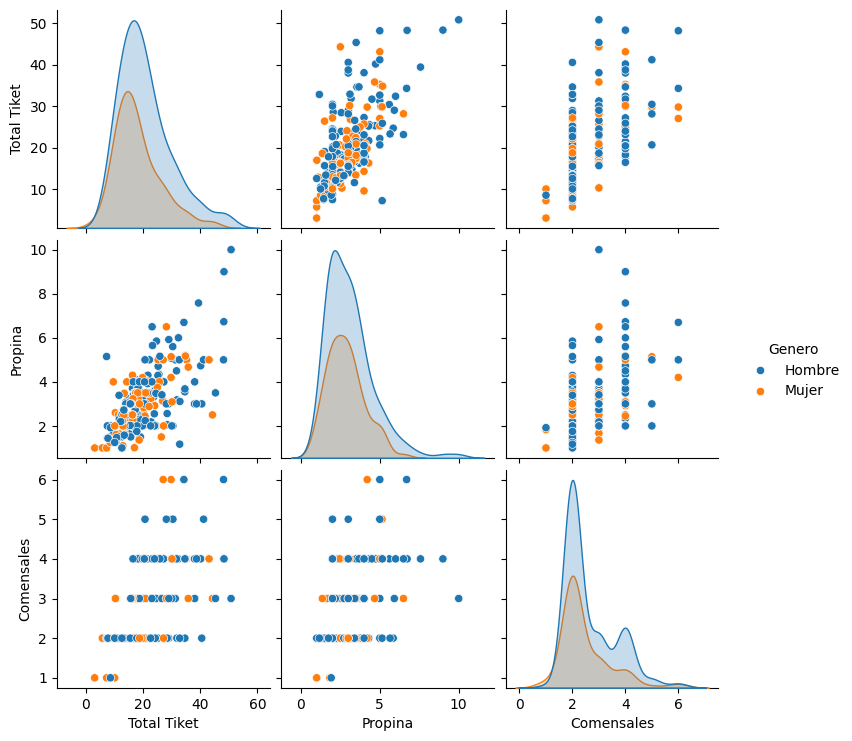

In [156]:
sns.pairplot(data=df, hue='Genero')
plt.show()

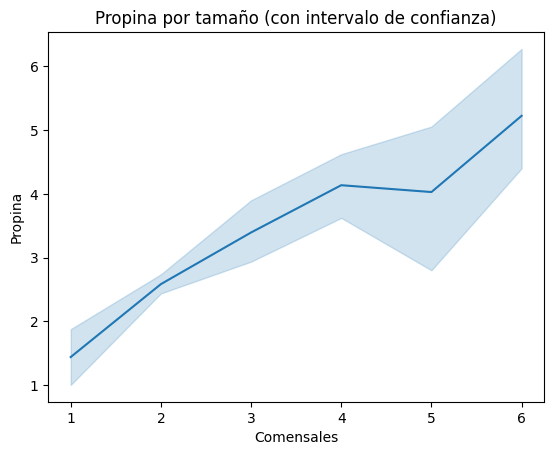

In [170]:
sns.lineplot(data=df, x='Comensales', y='Propina')
plt.title('Propina por tamaño (con intervalo de confianza)')
plt.show()

#### Graficos Multivariantes

## 6.Preparar feature


#### Encoding   

nota recordatoria ( RECORDAD BORRAR) 
.map   de Panda  o  OrdinalEncoder de ScikiLearn  a para trasformar a ordinal ( 1,2,3,4,,5  o bajo, medio, alto )
.get_dummies de Panda o  OneHotEncoder de ScikiitLearn ,  para  hacer one-hote ( dividimos ciudades en : city_madrid , city_sevilla, etc ) 

para smoker y sex  utilizar perfectamente un .map 
para los dias de la semana un get_dummies 

## 7.Entrenar modelo

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

#### Modelo

In [24]:
modelo = LinearRegression()


#### Entrenamiento
- Dividir datos: Empezamos con una sola feature  y conforme avancemos integraremos mas feature

In [25]:
# X=df[['Total Tiket']]
# y=df['Propina']

#### Prediccion

### Metricas

In [26]:
## mae = mean_absolute_error()
print(f"MAE:  {mae:.4f}")

TypeError: missing a required argument: 'y_true'

#### Evaluacion

## 8.Evaluar rendimiento

## 9.Conclusiones